In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten,Conv2D,BatchNormalization,MaxPooling2D

import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [3]:
general_path = '/kaggle/input/gtzan-dataset-music-genre-classification'
print(list(os.listdir(f'{general_path}/Data/genres_original/')))  # making list of all directory.

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


In [4]:
print("Details of Jazz class song:")
y, sr = librosa.load(f'/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00053.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', len(y)/sr)

Details of Jazz class song:
y: [ 0.06201172  0.06365967  0.07931519 ... -0.14196777 -0.16790771
 -0.16546631] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [5]:
print("Details of Disco class song:")
y, sr = librosa.load(f'/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00002.wav')
print('y:', y, '\n')
print('y shape:', np.shape(y), '\n')
print('Sample Rate (KHz):', sr, '\n')
print('Check Len of Audio:', len(y)/sr)

Details of Disco class song:
y: [0.09420776 0.09906006 0.0581665  ... 0.05667114 0.04855347 0.10333252] 

y shape: (661794,) 

Sample Rate (KHz): 22050 

Check Len of Audio: 30.013333333333332


In [6]:
base_path="/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"
paths = []
labels = [] # Empty list to enlist all path of each individual file
for root,_,files in os.walk(base_path):
   for filename in files:
       # this file particularly corrupted, so we skip this file.
       if os.path.join(root, filename)!='/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/jazz/jazz.00054.wav':
           paths.append(os.path.join(root, filename))   # joining root path with file name and enlisting them in paths list
           labels.append(os.path.join(root, filename).split('/')[-2]) 

In [7]:
paths

['/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00031.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00089.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00079.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00030.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00060.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00082.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00038.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00006.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disco/disco.00075.wav',
 '/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/disc

In [8]:
labels

['disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',
 'disco',


In [9]:
len(paths)

999

In [10]:
len(labels)

999

In [11]:
# # coverting the sound frequency to np.array 
# mel=[]
# for i in range(len(paths)):
#     x, sr = librosa.load(paths[i])
    
#     X = librosa.feature.melspectrogram(y=x, sr= sr, hop_length=512, n_mels=128)    
#     X = librosa.power_to_db(X, ref = np.max)
#     mel.append(X)

# # padding the mel dataset
# for i in range(len(mel)):
#     mel[i] = pad_sequences(mel[i], maxlen=1300, padding='post')


# # Processing the data for saving the data
# arr = []
# for i in range(len(mel)):
#     arr.append(mel[i].flatten())

# arr = np.array(arr)

# # saving in two fille format,pefer parquet as it takes less space 

# # # csv 
# # np.savetxt('mel_2d.csv', arr, delimiter=',')

# # parquet 
# pd.DataFrame(arr).to_parquet('mel_2d.parquet',compression='gzip')

In [12]:
# Start form here 

# Loading the dataset 
dataMelSpec = pd.read_parquet('/kaggle/input/logmelaudiodata')

# preproccing the dataset into a required format for deep learning 
# mel_3d = []
# for i in range(len(mel_2d)):
#     mel_3d.append(mel_2d.iloc[i].values.reshape(128, 1300))
# mel_3d = np.array(mel_3d)

In [13]:
dataMelSpec.sample(5)   # last 7 columns are zero padded to fit in CNN architecture.

,0,1,2,3,4,5,6,7,8,9,...,166390,166391,166392,166393,166394,166395,166396,166397,166398,166399
147,-20,-22,-24,-25,-25,-26,-27,-27,-28,-26,...,-80,-80,-73,0,0,0,0,0,0,0
765,-37,-36,-35,-34,-33,-36,-36,-39,-41,-42,...,-69,-67,-65,-53,-53,-59,-64,-65,-62,-64
507,-46,-39,-36,-35,-39,-42,-41,-43,-48,-46,...,-51,-46,-43,0,0,0,0,0,0,0
887,-30,-36,-55,-57,-58,-57,-51,-52,-55,-58,...,-72,-72,-68,0,0,0,0,0,0,0
195,-27,-22,-22,-21,-22,-22,-23,-22,-22,-22,...,-80,-66,-60,0,0,0,0,0,0,0


In [14]:
dataMelSpec.shape

(999, 166400)

In [15]:
dataMelSpec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 166400 entries, 0 to 166399
dtypes: int32(166400)
memory usage: 634.1 MB


In [16]:
#  mfcc = []
#  for i in range(len(paths)):
#     x, sr = librosa.load(paths[i])
#     mfccObj = librosa.feature.mfcc(y=x, sr=sr, n_mfcc = 20)
#     mfcc.append(mfccObj)
     
# # # padding the mel dataset
# for i in range(len(mfcc)):
#     mfcc[i] = pad_sequences(mfcc[i], maxlen=1305, padding='post')
    
# # # Processing the data for saving the data
# arr_mfcc = []
# for i in range(len(mfcc)):
#     arr_mfcc.append(mfcc[i].flatten())
    
# arr_mfcc = np.array(arr_mfcc)

# # # parquet 
# pd.DataFrame(arr_mfcc).to_parquet('mfcc_2d.parquet',compression='gzip')

In [17]:
# Start form here 

# Loading the dataset 
dataMfccSpec = pd.read_parquet('/kaggle/input/mfccdataspec')

# preproccing the dataset into a required format for deep learning 
# mel_3d = []
# for i in range(len(mel_2d)):
#     mel_3d.append(mel_2d.iloc[i].values.reshape(128, 1300))
# mel_3d = np.array(mel_3d)

In [18]:
dataMfccSpec.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,26090,26091,26092,26093,26094,26095,26096,26097,26098,26099
752,-314,-261,-197,-152,-116,-112,-124,-121,-132,-148,...,0,0,0,0,0,0,0,0,0,0
338,-124,-109,-90,-33,-11,-4,-5,-11,-30,-57,...,0,0,0,0,0,0,0,0,0,0
926,-267,-267,-276,-271,-274,-283,-288,-299,-303,-307,...,0,0,0,0,0,0,0,0,0,0
336,-1,31,18,5,-1,-8,-16,-27,-54,-93,...,0,0,0,0,0,0,0,0,0,0
276,-87,-87,-125,-158,-171,-170,-208,-230,-121,-25,...,0,0,0,0,0,0,0,0,0,0


In [19]:
dataMfccSpec.shape

(999, 26100)

In [20]:
dataMfccSpec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 26100 entries, 0 to 26099
dtypes: int32(26100)
memory usage: 99.5 MB


In [21]:
from sklearn.preprocessing import LabelEncoder
ohe = LabelEncoder()
labels = ohe.fit_transform(labels)

In [22]:
# Spliting DataSet

from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(dataMelSpec, labels,test_size = 0.3, random_state = 42)

# Spliting for validation set:
X_val,X_test,y_val,y_test = train_test_split(X_temp, y_temp,test_size = 0.5, random_state = 42)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors as needed

# Train the classifier
knn.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_knn = knn.predict(X_val)
print("Validation Accuracy (KNN):", accuracy_score(y_val, y_val_pred_knn))

# Test on the test set
y_test_pred_knn = knn.predict(X_test)
print("Test Accuracy (KNN):", accuracy_score(y_test, y_test_pred_knn))

# Detailed classification report
print("\nClassification Report (KNN):\n", classification_report(y_test, y_test_pred_knn))


Validation Accuracy (KNN): 0.36
Test Accuracy (KNN): 0.2866666666666667

Classification Report (KNN):
               precision    recall  f1-score   support

           0       0.42      0.23      0.29        22
           1       0.73      0.58      0.65        19
           2       0.20      0.07      0.10        15
           3       0.38      0.17      0.23        18
           4       0.40      0.67      0.50         9
           5       0.10      0.50      0.17         8
           6       0.17      1.00      0.29         7
           7       0.67      0.40      0.50        15
           8       0.00      0.00      0.00        25
           9       0.00      0.00      0.00        12

    accuracy                           0.29       150
   macro avg       0.31      0.36      0.27       150
weighted avg       0.32      0.29      0.27       150



In [24]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

# Initialize the SVM classifier
svm = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can adjust kernel, C, and gamma

# Train the classifier
svm.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred_svm = svm.predict(X_val)
print("Validation Accuracy (SVM):", accuracy_score(y_val, y_val_pred_svm))

# Test on the test set
y_test_pred_svm = svm.predict(X_test)
print("Test Accuracy (SVM):", accuracy_score(y_test, y_test_pred_svm))

# Detailed classification report
print("\nClassification Report (SVM):\n", classification_report(y_test, y_test_pred_svm))


Validation Accuracy (SVM): 0.5133333333333333
Test Accuracy (SVM): 0.3933333333333333

Classification Report (SVM):
               precision    recall  f1-score   support

           0       0.71      0.23      0.34        22
           1       0.76      0.84      0.80        19
           2       0.29      0.13      0.18        15
           3       0.00      0.00      0.00        18
           4       0.38      0.56      0.45         9
           5       0.05      0.12      0.07         8
           6       0.33      1.00      0.50         7
           7       0.55      0.80      0.65        15
           8       0.82      0.36      0.50        25
           9       0.11      0.17      0.13        12

    accuracy                           0.39       150
   macro avg       0.40      0.42      0.36       150
weighted avg       0.47      0.39      0.38       150



In [25]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid_knn = {'n_neighbors': [1,2,3,4,5,6,7,8,9,10]}

# GridSearch for KNN
grid_knn = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=5, scoring='accuracy')
grid_knn.fit(X_train, y_train)

print("Best Parameters for KNN:", grid_knn.best_params_)
print("Best Cross-Validation Accuracy (KNN):", grid_knn.best_score_)


Best Parameters for KNN: {'n_neighbors': 10}
Best Cross-Validation Accuracy (KNN): 0.3834018499486126


from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  # Also ensure you have imported SVC if not already

# Define parameter grid for SVM
param_grid_svm = {'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'], 'kernel': ['rbf', 'linear']}

# GridSearch for SVM
grid_svm = GridSearchCV(SVC(), param_grid_svm, cv=5, scoring='accuracy')
grid_svm.fit(X_train, y_train)

print("Best Parameters for SVM:", grid_svm.best_params_)


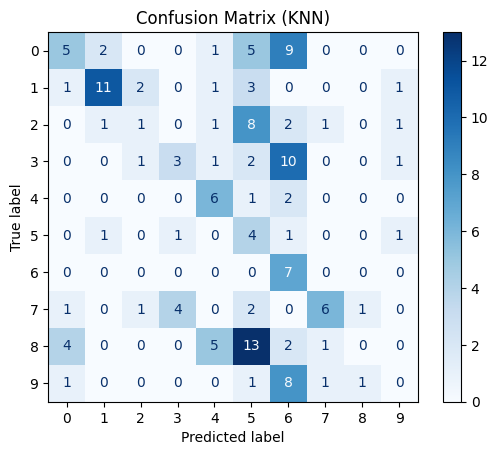

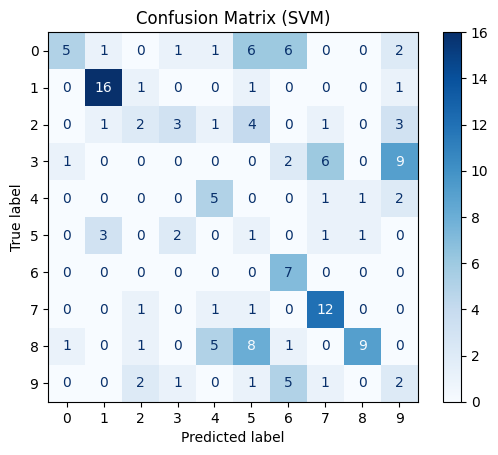

In [26]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues', values_format='d')
    plt.title(title)
    plt.show()

# Plot for KNN
plot_confusion_matrix(y_test, y_test_pred_knn, "Confusion Matrix (KNN)")

# Plot for SVM
plot_confusion_matrix(y_test, y_test_pred_svm, "Confusion Matrix (SVM)")


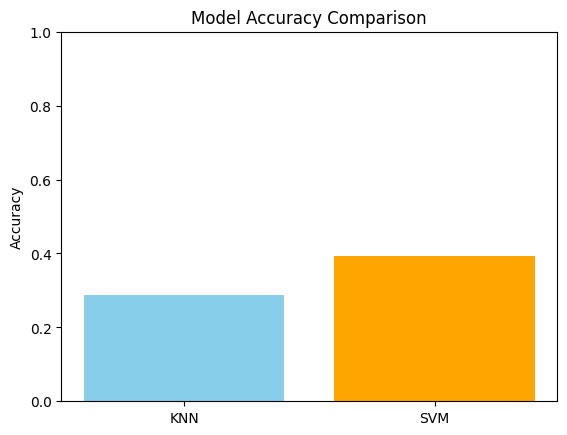

In [27]:
# Example: Validation accuracies of KNN and SVM
models = ['KNN', 'SVM']
accuracies = [accuracy_score(y_test, y_test_pred_knn), accuracy_score(y_test, y_test_pred_svm)]

# Plot
plt.bar(models, accuracies, color=['skyblue', 'orange'])
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.ylim(0, 1)
plt.show()


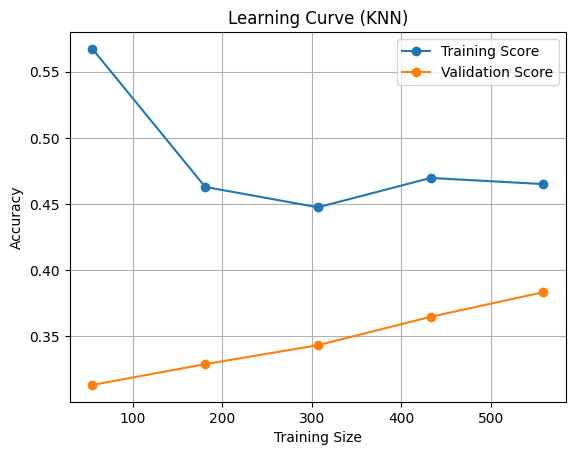

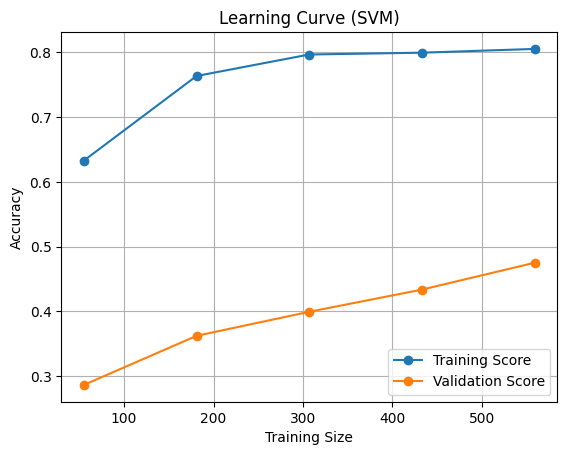

In [28]:
from sklearn.model_selection import learning_curve

# Function to plot learning curves
def plot_learning_curve(estimator, X, y, title):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring='accuracy', n_jobs=-1
    )
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)

    plt.plot(train_sizes, train_scores_mean, label="Training Score", marker='o')
    plt.plot(train_sizes, test_scores_mean, label="Validation Score", marker='o')
    plt.xlabel("Training Size")
    plt.ylabel("Accuracy")
    plt.title(title)
    plt.legend()
    plt.grid()
    plt.show()

# Learning curve for KNN
plot_learning_curve(KNeighborsClassifier(n_neighbors=10), X_train, y_train, "Learning Curve (KNN)")

# Learning curve for SVM
plot_learning_curve(SVC(kernel='rbf', C=1.0, gamma='scale'), X_train, y_train, "Learning Curve (SVM)")


In [33]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler


X_train = X_train.values.reshape(-1, 128, 1300, 1)
X_test = X_test.values.reshape(-1, 128, 1300, 1)

cnn = Sequential()

# First Convolutional Block
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(128, 1300, 1)))
cnn.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))
cnn.add(Dropout(0.4))
cnn.add(BatchNormalization())

# Second Convolutional Block
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))
cnn.add(Dropout(0.4))
cnn.add(BatchNormalization())

# Flattening
cnn.add(Flatten())

# Fully Connected Layers with Regularization
cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.4))
cnn.add(BatchNormalization())

cnn.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.4))
cnn.add(BatchNormalization())

# Output Layer
cnn.add(Dense(41, activation='softmax'))

# Compile the model
cnn.compile(loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam')

# Summary of the model
cnn.summary()


# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model with data augmentation
history = cnn.fit(X_train, y_train, epochs=150, batch_size=64,
                  validation_data=(X_test,y_test),
                  callbacks=[early_stopping, reduce_lr])

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 1300, 32)  │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 128, 1300, 32)  │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 64, 650, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 650, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 64, 650, 32)    │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 650, 64)    │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 650, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 32, 325, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 325, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 32, 325, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 665600)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    85,196,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 41)             │         2,665 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 85,273,993 (325.29 MB)

 Trainable params: 85,273,417 (325.29 MB)

 Non-trainable params: 576 (2.25 KB)

Epoch 1/150


I0000 00:00:1733897824.399851     138 service.cc:145] XLA service 0x7d446c007060 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1733897824.399951     138 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0
2024-12-11 06:17:28.843631: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[64,32,128,1300]{3,2,1,0}, f32[64,32,128,1300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-11 06:17:32.396334: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.552795254s
Trying algorithm eng0{} for co

10/11 ━━━━━━━━━━━━━━━━━━━━ 0s 308ms/step - accuracy: 0.0531 - loss: 4.6104

2024-12-11 06:18:09.850537: E external/local_xla/xla/service/slow_operation_alarm.cc:65] Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[59,32,128,1300]{3,2,1,0}, f32[59,32,128,1300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn_conv_backend_config":{"conv_result_scale":1,"activation_mode":"kNone","side_input_scale":0,"leakyrelu_alpha":0}} is taking a while...
2024-12-11 06:18:13.026040: E external/local_xla/xla/service/slow_operation_alarm.cc:133] The operation took 4.175619747s
Trying algorithm eng0{} for conv (f32[32,32,3,3]{3,2,1,0}, u8[0]{0}) custom-call(f32[59,32,128,1300]{3,2,1,0}, f32[59,32,128,1300]{3,2,1,0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBackwardFilter", backend_config={"operation_queue_id":"0","wait_on_operation_queues":[],"cudnn

11/11 ━━━━━━━━━━━━━━━━━━━━ 92s 5s/step - accuracy: 0.0581 - loss: 4.6461 - val_accuracy: 0.1800 - val_loss: 74.4427 - learning_rate: 0.0010
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 376ms/step - accuracy: 0.2261 - loss: 5.3268 - val_accuracy: 0.1267 - val_loss: 64.4832 - learning_rate: 0.0010
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.3113 - loss: 5.7094 - val_accuracy: 0.1267 - val_loss: 29.1189 - learning_rate: 0.0010
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 375ms/step - accuracy: 0.3498 - loss: 5.7753 - val_accuracy: 0.1267 - val_loss: 22.3239 - learning_rate: 0.0010
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.4667 - loss: 5.4136 - val_accuracy: 0.1867 - val_loss: 8.0170 - learning_rate: 0.0010
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 374ms/step - accuracy: 0.5515 - loss: 5.1361 - val_accuracy: 0.2067 - val_loss: 6.2126 - learning_rate: 0.0010
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 4s 378ms/step - accuracy: 0.6256 - loss: 4.8247 - val

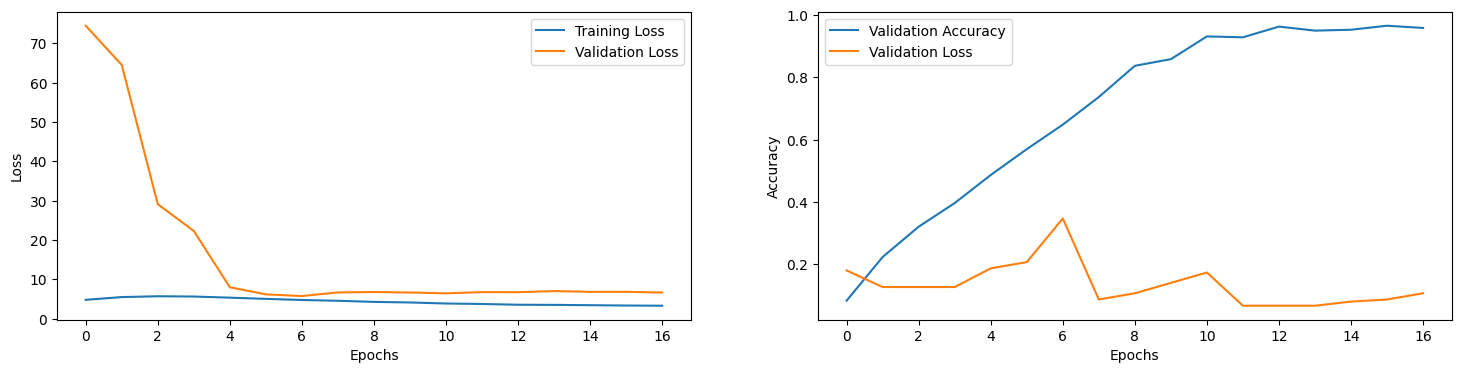

In [35]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Validation Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [53]:
# Spliting DataSet

from sklearn.model_selection import train_test_split

X_train,X_temp,y_train,y_temp = train_test_split(dataMfccSpec, labels,test_size = 0.3, random_state = 42)

# Spliting for validation set:
X_val,X_test,y_val,y_test = train_test_split(X_temp, y_temp,test_size = 0.5, random_state = 42)

In [57]:
from keras.regularizers import l2
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.callbacks import LearningRateScheduler
from tensorflow.keras.layers import GlobalAveragePooling2D, Conv2D, MaxPooling2D, Dropout, BatchNormalization, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

# Convert the DataFrame to a NumPy array and reshape it
X_train = X_train.to_numpy().reshape(-1, 90, 290, 1)
X_test = X_test.to_numpy().reshape(-1, 90, 290, 1)

# Normalize the input data
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Data Augmentation
datagen = ImageDataGenerator(
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)
datagen.fit(X_train)

# Model architecture
cnn = Sequential()

# First Convolutional Block (Increased filters and depth)
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(90, 290, 1)))
cnn.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

# Second Convolutional Block
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

# Third Convolutional Block
cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
cnn.add(MaxPooling2D(2, 2))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

# Instead of Flatten(), use GlobalAveragePooling2D
cnn.add(GlobalAveragePooling2D())

# Fully connected layers with increased depth and regularization
cnn.add(Dense(512, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

cnn.add(Dense(256, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

cnn.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
cnn.add(Dropout(0.5))
cnn.add(BatchNormalization())

# Output Layer
cnn.add(Dense(41, activation='softmax'))

# Compile the model
cnn.compile(loss='sparse_categorical_crossentropy',
            metrics=['accuracy'],
            optimizer='adam')

# Summary of the model
cnn.summary()

# Early stopping to prevent overfitting
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Learning rate reduction on plateau
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.0001)

# Fit the model with data augmentation
history2 = cnn.fit(datagen.flow(X_train, y_train, batch_size=64),
                  epochs=150,
                  validation_data=(X_test, y_test),
                  callbacks=[early_stopping, reduce_lr])


Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_40 (Conv2D)              │ (None, 90, 290, 64)    │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 90, 290, 64)    │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 45, 145, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_38 (Dropout)            │ (None, 45, 145, 64)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_38          │ (None, 45, 145, 64)    │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 45, 145, 128)   │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 45, 145, 128)   │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 22, 72, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_39 (Dropout)            │ (None, 22, 72, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_39          │ (None, 22, 72, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_44 (Conv2D)              │ (None, 22, 72, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_45 (Conv2D)              │ (None, 22, 72, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_22 (MaxPooling2D) │ (None, 11, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_40 (Dropout)            │ (None, 11, 36, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_40          │ (None, 11, 36, 256)    │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_5      │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_26 (Dense)                │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_41 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_41          │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_42 (Dropout)            │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_42          │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │             

 Total params: 1,450,729 (5.53 MB)

 Trainable params: 1,448,041 (5.52 MB)

 Non-trainable params: 2,688 (10.50 KB)

Epoch 1/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 28s 1s/step - accuracy: 0.0326 - loss: 5.2258 - val_accuracy: 0.0600 - val_loss: 4.4959 - learning_rate: 0.0010
Epoch 2/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 162ms/step - accuracy: 0.0414 - loss: 5.0586 - val_accuracy: 0.1267 - val_loss: 4.4229 - learning_rate: 0.0010
Epoch 3/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.0580 - loss: 4.8245 - val_accuracy: 0.0800 - val_loss: 4.3631 - learning_rate: 0.0010
Epoch 4/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 161ms/step - accuracy: 0.0840 - loss: 4.5846 - val_accuracy: 0.0800 - val_loss: 4.3266 - learning_rate: 0.0010
Epoch 5/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.1168 - loss: 4.5429 - val_accuracy: 0.0800 - val_loss: 4.2698 - learning_rate: 0.0010
Epoch 6/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 163ms/step - accuracy: 0.1565 - loss: 4.2630 - val_accuracy: 0.0800 - val_loss: 4.1994 - learning_rate: 0.0010
Epoch 7/150
11/11 ━━━━━━━━━━━━━━━━━━━━ 3s 165ms/step - accuracy: 0.1413 - loss: 4.23

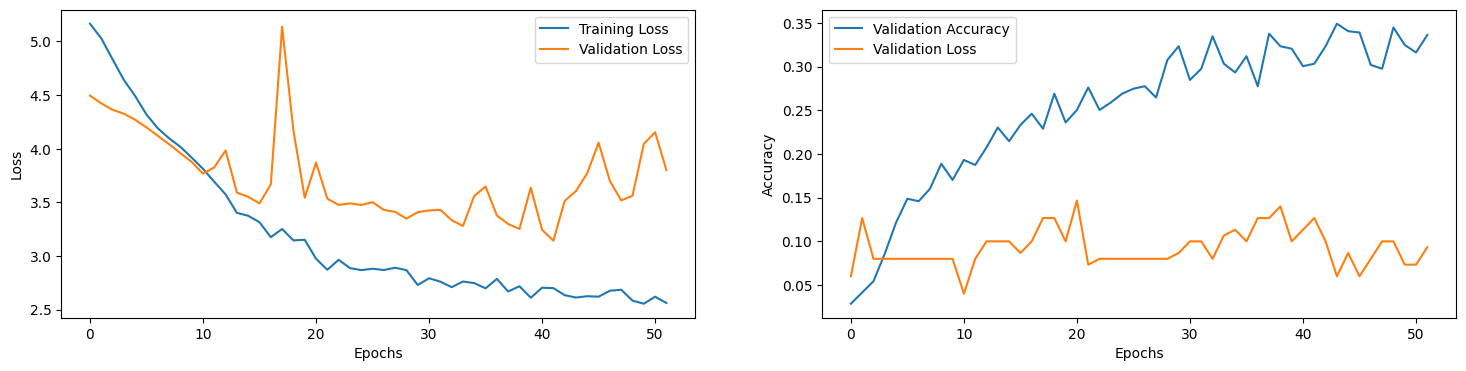

In [58]:
plt.figure(figsize=(18, 4))

plt.subplot(1, 2, 1)
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history2.history['accuracy'], label='Validation Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()